In [1]:
# Setup auto reload
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc("font", **{"size": 18})
import numpy as np
from warnings import filterwarnings
import logging

logging.basicConfig(level=logging.INFO, format="%(asctime)s | %(levelname)s | %(message)s")

filterwarnings("ignore")

import investment_lab.option_selection as option_selection
import investment_lab.backtest as backtest
from investment_lab.data.option_db import SPYOptionLoader
from investment_lab.data.rates_db import USRatesLoader
from investment_lab.option_trade import OptionTrade
from investment_lab.backtest import StrategyBacktester

from investment_lab.pricing.black_scholes import black_scholes_price, black_scholes_greeks
from investment_lab.rates import compute_forward
from investment_lab import option_strategies as option_strategies

In [3]:

df_SHORT_1W_STRANGLE_95_105 = OptionTrade.generate_trades(
    datetime(2020, 1, 2), datetime(2022, 12, 30), tickers="SPY", legs=option_strategies.SHORT_1W_STRANGLE_95_105, cost_neutral=False
)



2026-01-30 11:04:15,574 | INFO | Loading option data from 2020-01-02 00:00:00 to 2022-12-30 00:00:00
2026-01-30 11:04:15,577 | INFO | Reading between 2020-01-02 00:00:00 2022-12-30 00:00:00 from ..//data/optiondb_2016_2023.parquet with None
2026-01-30 11:04:30,236 | INFO | Processing with {'ticker': 'SPY'}
2026-01-30 11:04:30,241 | INFO | Potentially add extra field with None
2026-01-30 11:04:40,981 | INFO | Preprocessing option data.
2026-01-30 11:04:40,983 | INFO | Selecting options for leg: Short K=95% Put 1W using the rules:
{'day_to_expiry_target': 7, 'strike_target': 0.95, 'strike_col': 'moneyness', 'call_or_put': 'P'}
2026-01-30 11:04:44,688 | INFO | Selecting options for leg: Short K=105% Call 1W using the rules:
{'day_to_expiry_target': 7, 'strike_target': 1.05, 'strike_col': 'moneyness', 'call_or_put': 'C'}
2026-01-30 11:04:46,954 | INFO | Converting 898 df_trades to daily time series
2026-01-30 11:04:54,950 | INFO | Forward filling option data for df_trades
2026-01-30 11:04:

In [4]:

backtest_SHORT_1W_STRANGLE_95_105 = StrategyBacktester(df_SHORT_1W_STRANGLE_95_105).compute_backtest()

2026-01-30 11:05:12,092 | INFO | Computing period to period difference.
2026-01-30 11:05:12,767 | INFO | Starting backtest computation over 781 unique dates.
100%|██████████| 781/781 [00:32<00:00, 23.75it/s]
2026-01-30 11:05:45,864 | INFO | Backtest computation completed.


In [5]:
from investment_lab.metrics.performance import sharpe_ratio, max_drawdown

In [6]:
max_drawdown(
    backtest_SHORT_1W_STRANGLE_95_105.nav.pct_change().dropna()
), sharpe_ratio(
    backtest_SHORT_1W_STRANGLE_95_105.nav.pct_change().dropna()
)

(NAV   -0.04429
 dtype: float64,
 NAV    0.514064
 dtype: float64)

In [7]:
df_SHORT_1W_STRANGLE_95_105.tail()

,date,option_id,entry_date,leg_name,weight,ticker,spot,strike,expiration,delta,...,bid,ask,volume,call_put,mid,day_to_expiration,moneyness,criterion,risk_free_rate,forward
5385,2022-12-30,SPY 20230103P364,2022-12-26,Short K=95% Put 1W,-0.000435,SPY,382.44,364.0,2023-01-03,-0.00948,...,0.02,0.03,657.0,P,0.025,4.0,0.951783,3.0,0.0412,382.612595
5386,2022-12-30,SPY 20230104C396,2022-12-28,Short K=105% Call 1W,-0.000442,SPY,382.44,396.0,2023-01-04,0.01625,...,0.03,0.04,394.0,C,0.035,5.0,1.035457,2.0,0.0412,382.655756
5387,2022-12-30,SPY 20230104P358,2022-12-28,Short K=95% Put 1W,-0.000442,SPY,382.44,358.0,2023-01-04,-0.00920,...,0.03,0.04,9.0,P,0.035,5.0,0.936095,2.0,0.0412,382.655756
5388,2022-12-30,SPY 20230106C402,2022-12-30,Short K=105% Call 1W,-0.000436,SPY,382.44,402.0,2023-01-06,0.01700,...,0.05,0.06,687.0,C,0.055,7.0,1.051145,0.0,0.0412,382.742092
5389,2022-12-30,SPY 20230106P363,2022-12-30,Short K=95% Put 1W,-0.000436,SPY,382.44,363.0,2023-01-06,-0.03958,...,0.18,0.19,382.0,P,0.185,7.0,0.949168,0.0,0.0412,382.742092


In [8]:
backtest_SHORT_1W_STRANGLE_95_105.drifted_positions.tail()

,date,option_id,weight,mid,entry_date,expiration,spot,implied_volatility,risk_free_rate,delta,...,scaled_weight,pnl,gamma_pnl,delta_pnl,theta_pnl,vega_pnl,rho_pnl,residual_pnl,leverage,cashflow
5385,2022-12-30,SPY 20230103P364,-0.000435,0.025,2022-12-26,2023-01-03,382.44,0.18664,0.0412,-0.00948,...,-0.000458,0.000009,-7.168460e-07,-0.000006,0.000011,2.039944e-08,2.309454e-10,4.769928e-06,-0.175244,0.000000
5386,2022-12-30,SPY 20230104C396,-0.000442,0.035,2022-12-28,2023-01-04,382.44,0.12686,0.0412,0.01625,...,-0.000466,0.000042,-2.337195e-06,0.000018,0.000021,2.530109e-07,-9.427116e-10,5.265940e-06,-0.178128,0.000000
5387,2022-12-30,SPY 20230104P358,-0.000442,0.035,2022-12-28,2023-01-04,382.44,0.22849,0.0412,-0.00920,...,-0.000466,0.000005,-4.667012e-07,-0.000005,0.000010,-4.280293e-08,3.614349e-10,-3.929752e-08,-0.178128,0.000000
5388,2022-12-30,SPY 20230106C402,-0.000436,0.055,2022-12-30,2023-01-06,382.44,0.15920,0.0412,0.01700,...,-0.000459,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,-0.175459,0.000025
5389,2022-12-30,SPY 20230106P363,-0.000436,0.185,2022-12-30,2023-01-06,382.44,0.20909,0.0412,-0.03958,...,-0.000459,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,-0.175459,0.000085


<Axes: >

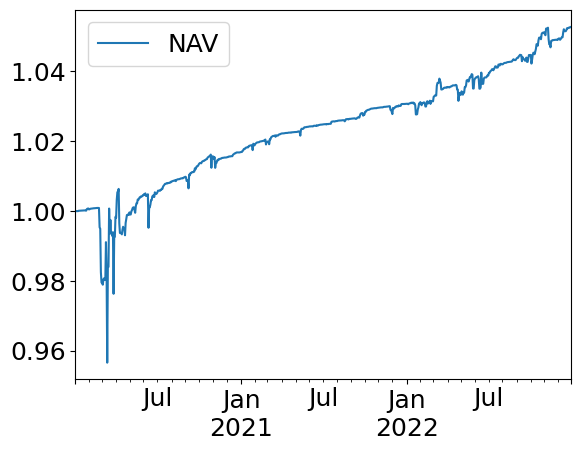

In [9]:
backtest_SHORT_1W_STRANGLE_95_105.nav.plot()

<Axes: >

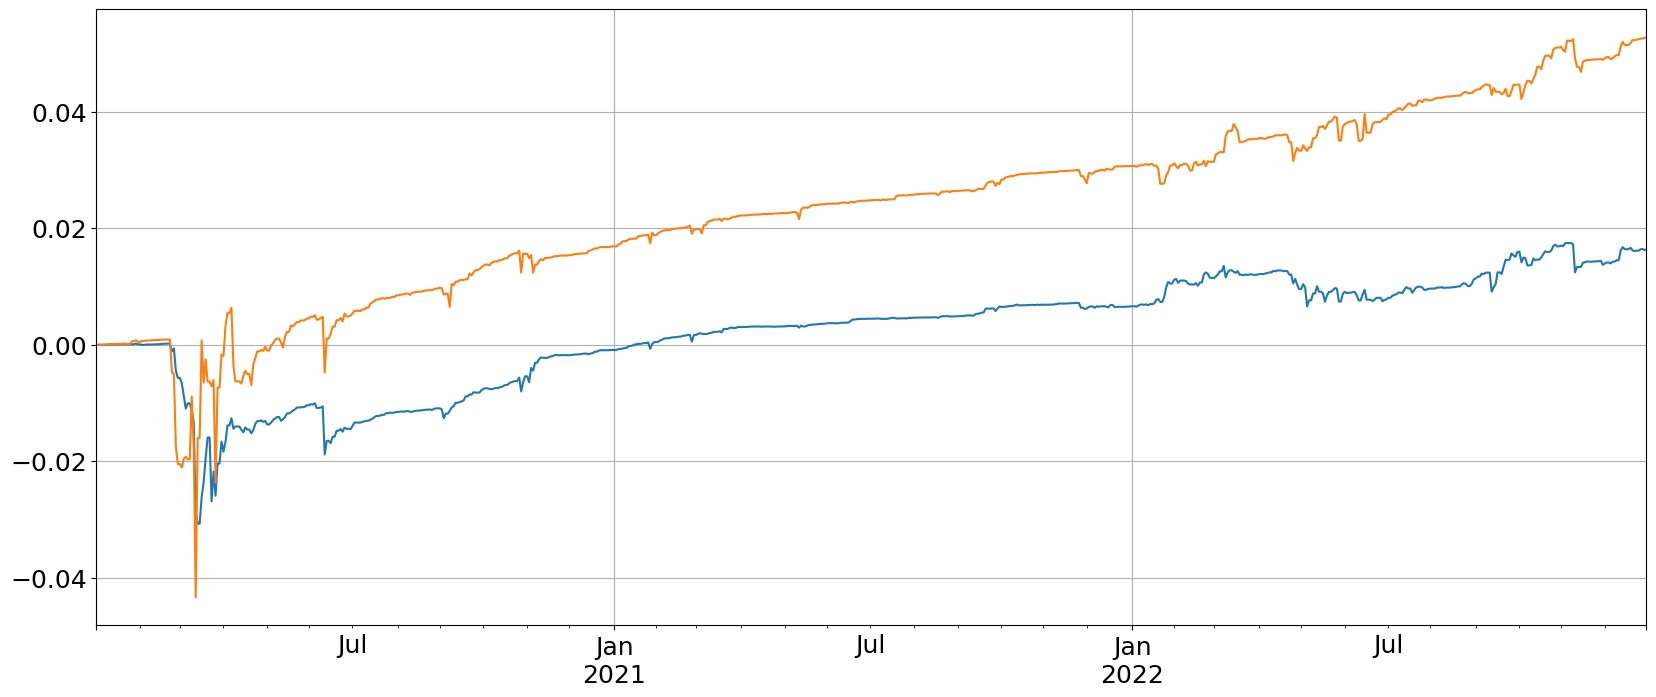

In [33]:
ax = (backtest_SHORT_1W_STRANGLE_95_105.pnl['pnl']-backtest_SHORT_1W_STRANGLE_95_105.pnl['delta_pnl']).cumsum().plot(figsize=(20,8))
backtest_SHORT_1W_STRANGLE_95_105.pnl['pnl'].cumsum().plot(ax=ax,grid=True)

In [14]:
df = backtest_SHORT_1W_STRANGLE_95_105.nav.copy()
df = df.merge(df_SHORT_1W_STRANGLE_95_105.groupby("date")[["spot"]].first(), left_index=True, right_index=True)
df['NAV_rets'] = df['NAV'].pct_change()
df['NAV_abs_rets'] = df['NAV_rets'].abs()
df['spot_rets'] = df['spot'].pct_change()
df['spot_abs_rets'] = df['spot_rets'].abs()
df

,NAV,spot,NAV_rets,NAV_abs_rets,spot_rets,spot_abs_rets
2020-01-03,1.000000,322.43,NaN,NaN,NaN,NaN
2020-01-06,1.000000,323.68,0.000000,0.000000,0.003877,0.003877
2020-01-07,1.000003,322.74,0.000003,0.000003,-0.002904,0.002904
2020-01-08,0.999990,324.39,-0.000013,0.000013,0.005112,0.005112
2020-01-09,1.000087,326.59,0.000098,0.000098,0.006782,0.006782
...,...,...,...,...,...,...
2022-12-26,1.052484,382.91,0.000000,0.000000,0.000078,0.000078
2022-12-27,1.052657,381.38,0.000165,0.000165,-0.003996,0.003996
2022-12-28,1.052634,376.71,-0.000022,0.000022,-0.012245,0.012245
2022-12-29,1.052754,383.33,0.000113,0.000113,0.017573,0.017573


array([[<Axes: title={'center': 'NAV_rets'}>,
        <Axes: title={'center': 'spot_rets'}>]], dtype=object)

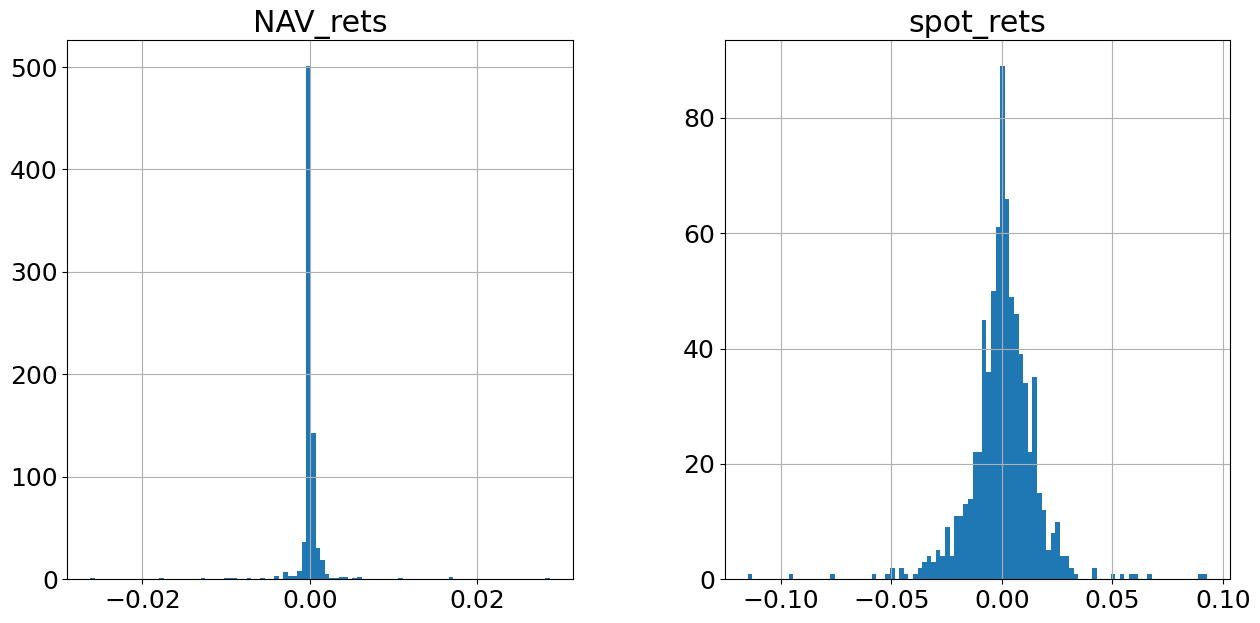

In [28]:
df[['NAV_rets','spot_rets']].hist(bins=100, figsize=(15,7))

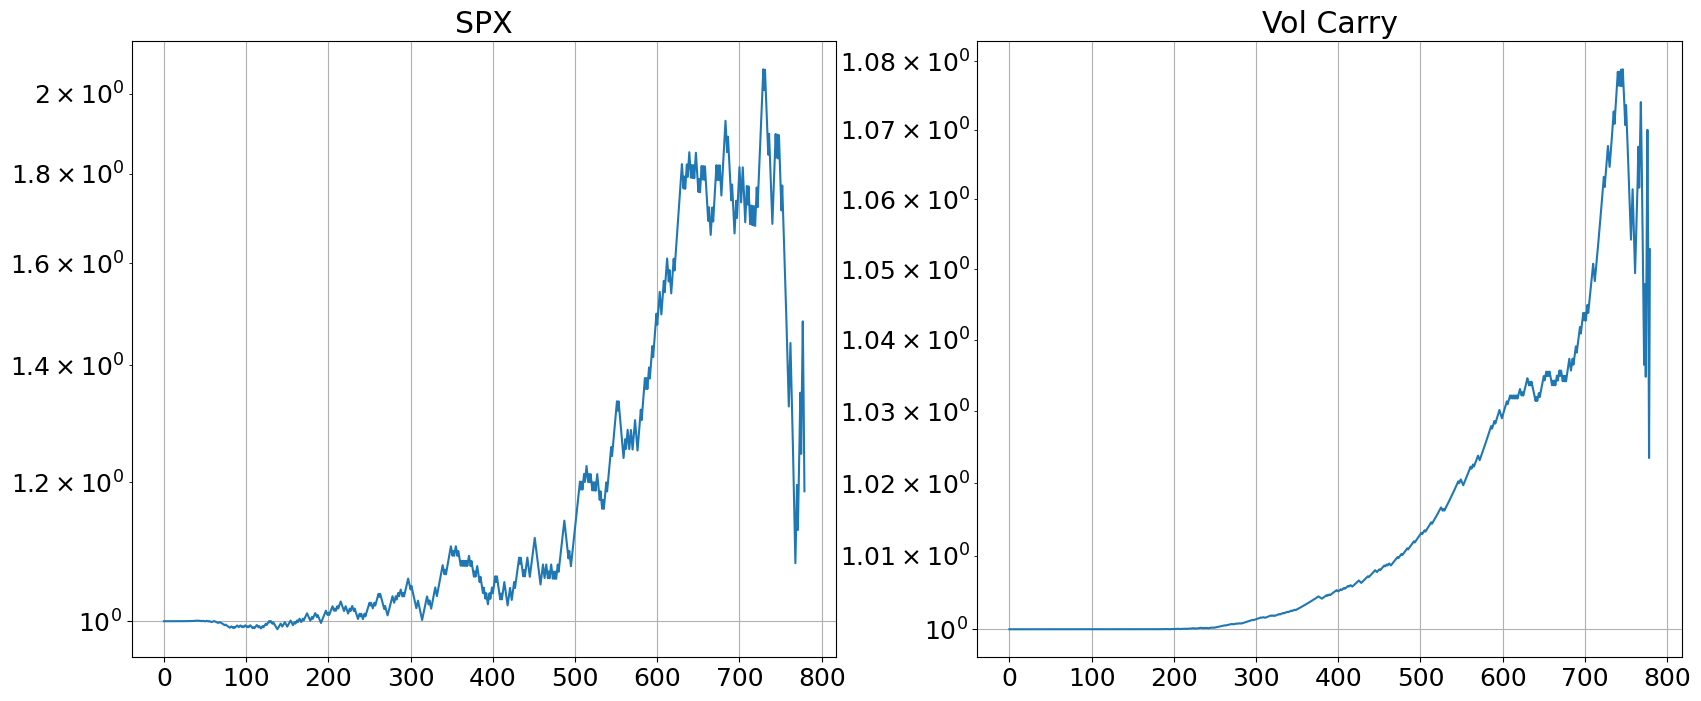

In [21]:
fig, (ax,ax2) = plt.subplots(1,2,figsize=(20,10))
(df[['spot_rets',"spot_abs_rets"]].sort_values("spot_abs_rets")['spot_rets']+1).cumprod().reset_index(drop=True).plot(label="Spot", figsize=(20,8),ax=ax,title="SPX",grid=True)
(df[['NAV_rets',"NAV_abs_rets"]].sort_values("NAV_abs_rets")['NAV_rets']+1).cumprod().reset_index(drop=True).plot(label="NAV", figsize=(20,8),ax=ax2,grid=True,title="Vol Carry")

ax.set_yscale("log")
ax2.set_yscale("log")

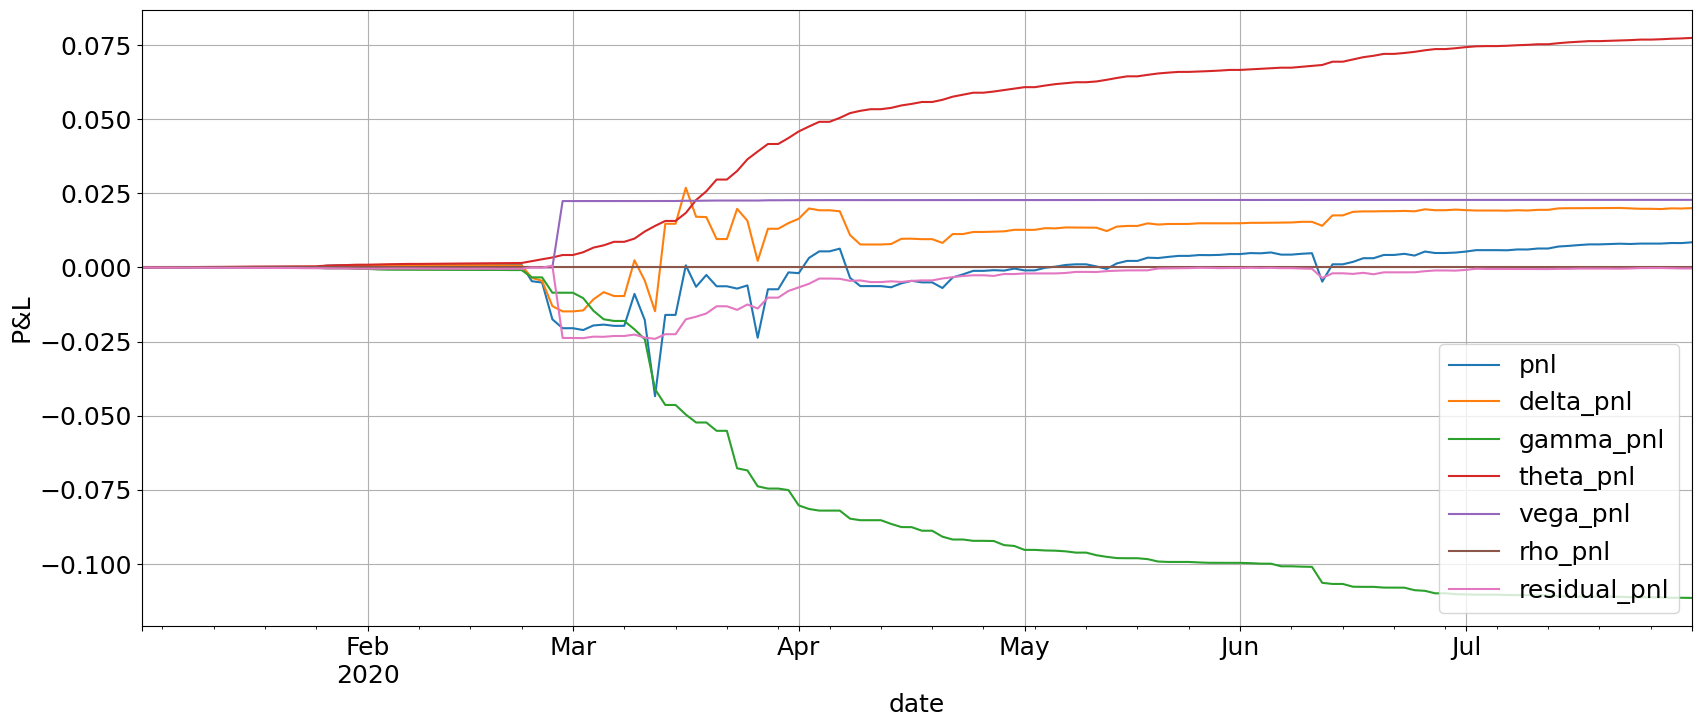

In [22]:
ax = backtest_SHORT_1W_STRANGLE_95_105.pnl.cumsum().loc[:"2020-08-01"].plot(figsize=(20,8),xlabel="date",ylabel="P&L",grid=True)
ax.legend(loc="lower right")

<Axes: >

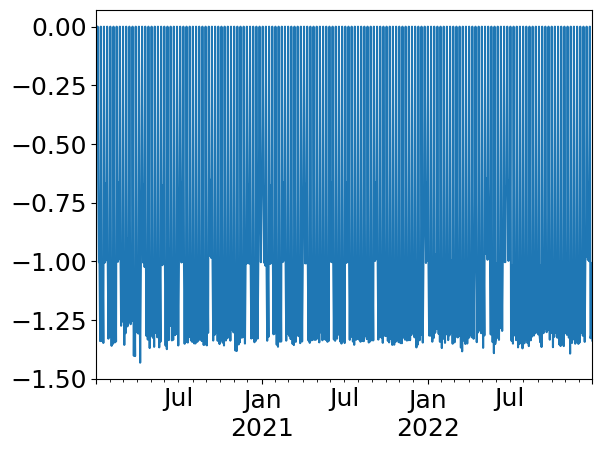

In [23]:
(backtest_SHORT_1W_STRANGLE_95_105.metainfo["leverage"]/backtest_SHORT_1W_STRANGLE_95_105.nav['NAV']).plot()

<Axes: xlabel='date', ylabel='Cashflow'>

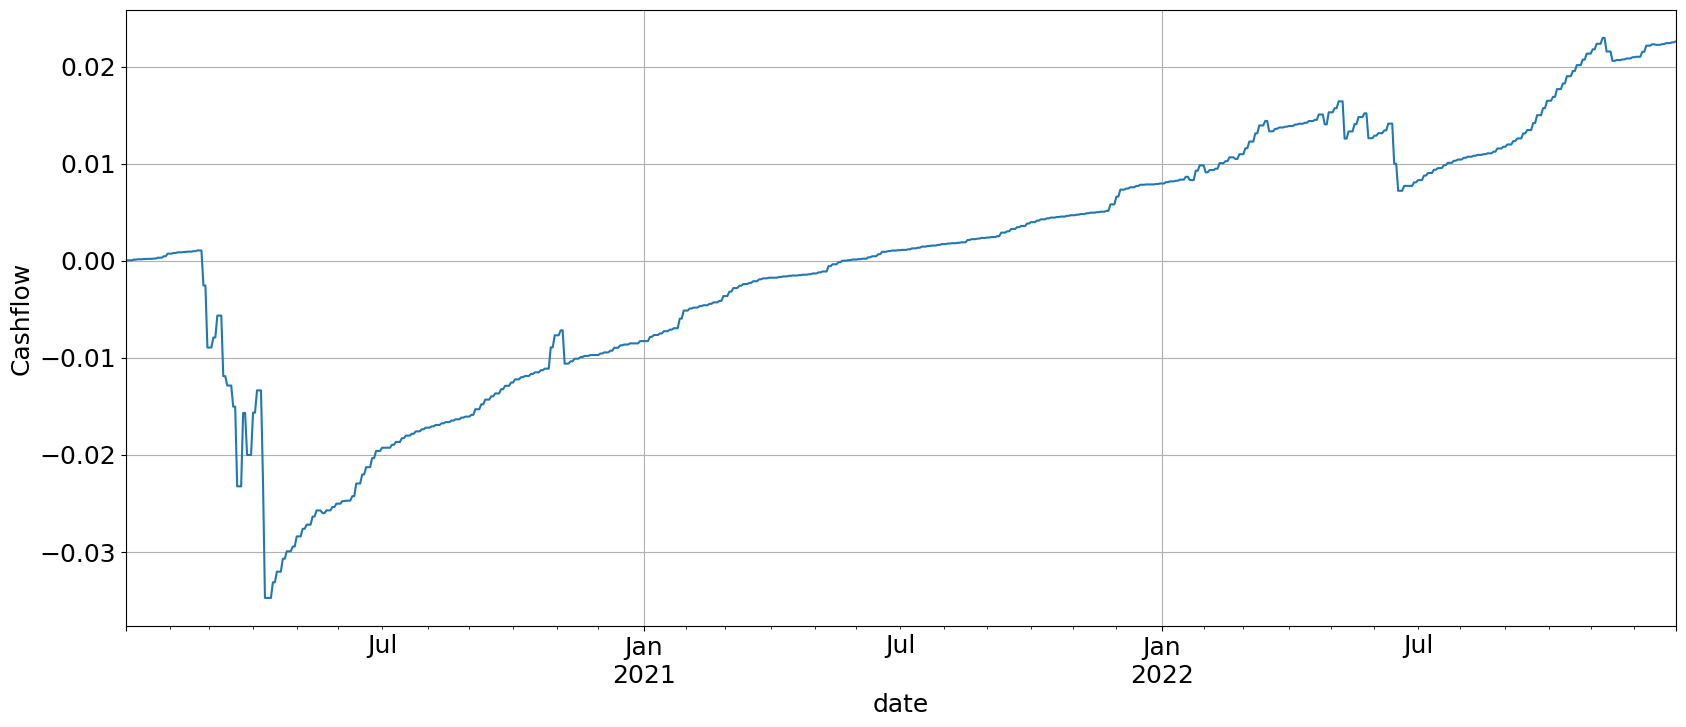

In [30]:
backtest_SHORT_1W_STRANGLE_95_105.metainfo["cashflow"].cumsum().plot(figsize=(20,8),xlabel="date",ylabel="Cashflow",grid=True)

<Axes: >

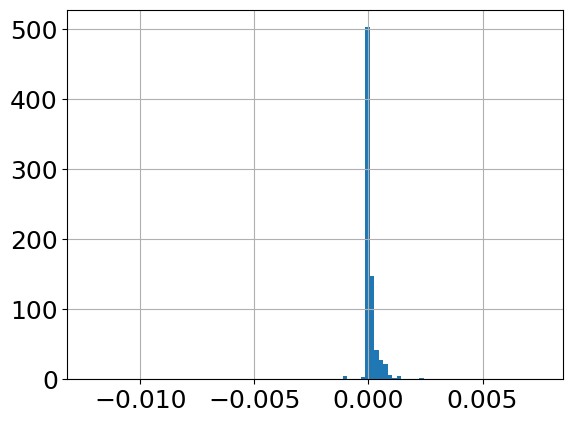

In [26]:
backtest_SHORT_1W_STRANGLE_95_105.metainfo["cashflow"].hist(bins=100)